## Pipeline de Dados do Twitter com Apache Nifi, Kafka e Mongodb

In [1]:
# Conexão com Mongodb

In [1]:
from pymongo import MongoClient

In [2]:
client = MongoClient('localhost', 27017)

In [2]:
# Consultando Dados Armazenados no Mongodb

In [3]:
db = client.twitterdb

In [4]:
col = db.coltwitter

In [5]:
col.find_one()

{'_id': ObjectId('614fe5c5ec132b16cbbed186'),
 'created_at': 'Sun Sep 26 03:01:43 +0000 2021',
 'id': 1441961150414008321,
 'id_str': '1441961150414008321',
 'text': 'RT @Cecillia: Deu pra entender a alegria do Mion assinando com outra emissora né? #AFazenda',
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1053356563774226433,
  'id_str': '1053356563774226433',
  'name': 'Samila Miranda',
  'screen_name': 'SamilaMiranda5',
  'location': None,
  'url': None,
  'description': 'Quando tudo for pedra, atire a primeira flor...🌸',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 4,
  'friends_count': 93,
  'listed_count': 0,
  'favourites_count': 3254,
  'statuses_count': 345,
  'created_at': 'Fri Oc

In [6]:
col

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'twitterdb'), 'coltwitter')

In [7]:
documents = col.find().limit(10)
lista = list(documents)
print(lista)

[{'_id': ObjectId('614fe5c5ec132b16cbbed186'), 'created_at': 'Sun Sep 26 03:01:43 +0000 2021', 'id': 1441961150414008321, 'id_str': '1441961150414008321', 'text': 'RT @Cecillia: Deu pra entender a alegria do Mion assinando com outra emissora né? #AFazenda', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1053356563774226433, 'id_str': '1053356563774226433', 'name': 'Samila Miranda', 'screen_name': 'SamilaMiranda5', 'location': None, 'url': None, 'description': 'Quando tudo for pedra, atire a primeira flor...🌸', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 4, 'friends_count': 93, 'listed_count': 0, 'favourites_count': 3254, 'statuses_count': 345, 'created_at': 'Fri Oct 19 18:45:50 +0000 2018', 'utc_offset': 

## Análise de Dados com Pandas e Scikit-Learn

In [8]:
dataset = [{"created_at": item["created_at"], "text": item["text"],} for item in col.find()]

In [9]:
import pandas as pd
pd.__version__

'1.2.4'

In [10]:
df = pd.DataFrame(dataset)

In [11]:
df

,created_at,text
0,Sun Sep 26 03:01:43 +0000 2021,RT @Cecillia: Deu pra entender a alegria do Mi...
1,Sun Sep 26 03:01:43 +0000 2021,RT @gossipdodia: Ela não tem noção nenhuma do ...
2,Sun Sep 26 03:01:43 +0000 2021,RT @kono_wis: As advogadas da @daymelloreal de...
3,Sun Sep 26 03:01:43 +0000 2021,Qual é o macho mais escroto de #AFazenda ?
4,Sun Sep 26 03:01:43 +0000 2021,RT @euosodrac: Beijo gay não pode! Estupro pod...
...,...,...
13611,Sun Sep 26 03:15:21 +0000 2021,"RT @dayrolpoxa2: exposição da vítima, omissão ..."
13612,Sun Sep 26 03:15:22 +0000 2021,RT @daani1016: ROMANTIZAÇÃO DE ESTUPRO NA RECO...
13613,Sun Sep 26 03:15:22 +0000 2021,RT @eunolascog: Meu sonho de princesa é a Glob...
13614,Sun Sep 26 03:15:22 +0000 2021,RT @ZAMENZA: A Record é a principal advogada d...


In [12]:
tweets = df['text']

In [13]:
todos_twitters = " ".join(s for s in tweets)

In [14]:
todos_twitters

'RT @Cecillia: Deu pra entender a alegria do Mion assinando com outra emissora né? #AFazenda RT @gossipdodia: Ela não tem noção nenhuma do que aconteceu #AFazenda RT @kono_wis: As advogadas da @daymelloreal devem procurar a justiça imediatamente! Sua cliente foi novamente vítima não de um mais de vári… Qual é o macho mais escroto de #AFazenda ? RT @euosodrac: Beijo gay não pode! Estupro pode e ainda é romantizado pela própria emissora. Sério, que nojo! #AFazenda RT @reality_sr: O recado da Galisteu com os olhos cheios de lágrimas 🥺 #AFazenda NÃO É NÃO https://t.co/9HR2wCLVYe RT @Wands_Ferreira: "Agora, depois de tudo isso, quando uma mulher diz não, é não. Quando uma mulher alcoolizada diz sim, tmb é não"\n\nGalis… RT @Cadu_Safner: 🚨Peões são comunicados sobre a expulsão de Nego do Borel🚨\n\n"Eu avisei, vocês são cegos? A menina estava bêbada" - Solange… RT @Wands_Ferreira: "Agora, depois de tudo isso, quando uma mulher diz não, é não. Quando uma mulher alcoolizada diz sim, tmb é não"\

## Criando uma WordCloud dos Trendings Topics no momento da Extração

In [15]:
!pip install Wordcloud

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [17]:
meu_stopwords = set(STOPWORDS)

In [18]:
meu_stopwords.update(['fazer','fazer uma','sem ter','bem detalhada','para min','a','as','e','o','os','meu','meus','seu','tuas','minha','sua','seus','suas','nossa','até','nossas','da','de','do','em','como','entre','estou','https','toda','durante','sempre','passou','pano','diretamente pelo','que eu','esquema das','ES','poder','são aqueles','não é','ajuda','não são','RT filipebarros','agora porque','kRwLhRsC','sobre','t','co','não','é','Tampouco conteúdos','discordo tampouco','Hang','Agora porque','jnascim Luciano','RT','são aqueles','OscWeTy6m2'])

In [19]:
my_cloud = WordCloud(stopwords=meu_stopwords, background_color='black',width=800, height=800).generate(todos_twitters)

In [20]:
import matplotlib.pyplot as plt

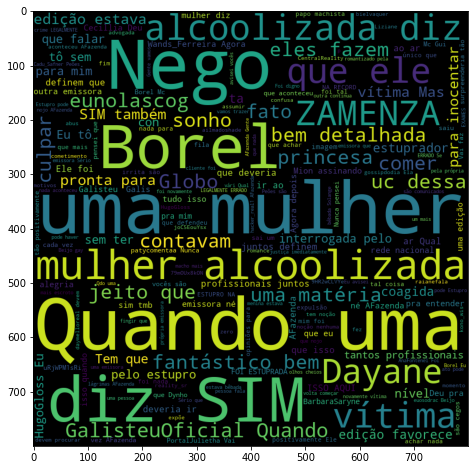

In [21]:
figura, eixo = plt.subplots(figsize=(8,8))
plt.imshow(my_cloud)